# Hypothesis Testing

One important reason we conduct data analysis is to examine our conjectures about how the world or some system operates.  This may be done explicitly using hypothesis testing or done implicitly when we develop of a statistical model for estimation and prediction.  Implicit in the prediction model is a hypothesis about the stability of relationships through time or through space.  

There is a formalized way to conduct hypothesis testing: a data scientist lays out a conjecture about a system in a formal manner, namely mutually exclusive and contradictory statement about the value of some parameter from a statistical model that characterizes the conjecture. 

A statistical hypothesis is a claim either about the value of a single population characteristic or about the values of several population characteristics.

## Canonical Example

A canonical example of hypothesis testing is a criminal trial in the US justic system.  The hypothesis examined by a jury is one of "not guilty" versus "guilty".  Formally, the null hypothesis the jury uses is "not guilty", and the alternative hypothesis is "guilty".  When thinking about hypothesis testing, it is useful to keep this example in mind. 

In hypothesis testing, a researcher should formulate the basic proposition such that one claim is initially favored (not guilty) and is rejected only in the face of sample evidence to the contrary (guilty).  Initially favored claim is typically called the null hypothesis, and a researcher rejects a null hypothesis in favor of the alternative hypothesis only in the face of considerable evidence to the contrary.  Otherwise, a researcher is said to "fail to reject" the null hypothesis.

We can write these hypotheses formally as:

$H_0$: Not guilty

$H_1$: Guilty

The jury maintains $H_0$ at the start of the trial.  During the trial, the state (as prosecution) presents evidence to the jury that is meant to change their maintained hypothesis.  It is only in the presence of overwhelming evidence that the jury moves from $H_0$ to $H_1$.  The absence of such evidence, however, does not prompt the jury to drop their maintained hypothesis of "Not guilty". 

## Two Ingredients and Two Possible Types of Error

### Ingredients
1. A "test statistic" of some type that is only the function of sample data.
2. A rejection region, based on a probability value, $\alpha$, which is a set of values for the test statistic for which $H_0$ will be rejected.  

Often we write the test statistic as $\hat\theta$, which is a function only of actual data representing some population characteristic, $\theta$.  As an example, the test statistic may be an average of some data, such as the average value of $x_1$ from our simulated data.  In this case, $\hat\theta=\frac{1}{n}\sum_i{x_i}$

Frequently, we are testing against of conjecture of 0.  For example,

$H_0$: $\theta=0$

$H_1$: $\theta\neq0$

### Two Types of Error

See the whiteboard.  There is the truth (which you do not know), and the decision you make.  Accordingly, there are two types of possible error.

Type 1 Error: Rejecting $H_0$ when it is, in fact, the truth.

Type 2 Error: Failing to reject $H_0$ when it is, in fact, false.

P(Type 1) = $\alpha$. (Typically, in social science, $\alpha=0.05$.)

From to the Central Limit Theorem, we know that test statistics, $\hat\theta$'s, are asymptotically distribution normal with a finite, non-zero variance.  (Proof outside of the scope of this class.)  Therefore, the normal distribution identifies our rejection regions.  When testing, we "z-normalize" the test statistic.  Namely,

$H_0$ : $\theta=\theta_0$

$H_1$ : $\theta\neq\theta_0$

Z-normalized or t-stat: $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}$

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = np.linspace(-3,3,1000)
pdf = np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

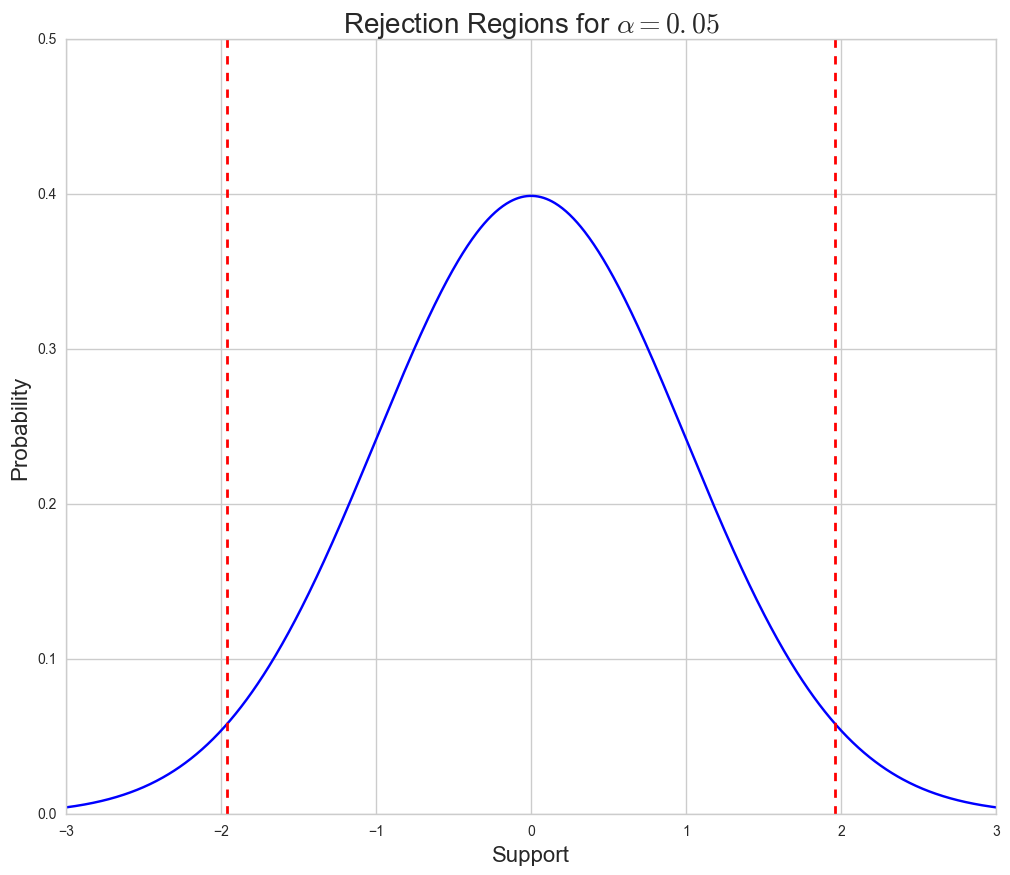

In [3]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title(r'Rejection Regions for $\alpha=0.05$', fontsize = 20)
plt.axvline(-1.96, color='r', ls='--', lw=2.0)
plt.axvline(1.96, color='r', ls='--', lw=2.0)

### Equivalences

Consider the follow general hypothesis formulation.  

$H_0$ : $\theta=\theta_0$

$H_1$ : $\theta\neq\theta_0$

Let $SE(\hat\theta)$ denote the standard error of the point estimate of $\theta$.  These are equivalent statements.

1.  $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}>\vert1.96\vert$ implies a rejection of $H_0$ at a 95% level of confidence.  
2. $\hat\theta\pm 1.96\cdot SE(\hat\theta)$ constitutes at 95% confidence interval around $\hat\theta$.  If this interval includes $\theta_0$, fail to reject $H_0$.
3. $\big\vert$t-stat$\big\vert$ in excess of 1.96 implies $\hat\theta$ is statistically different than $\theta_0$.  (Rule of thumb, greater than 2 in absolute value.)

In practice, we let the computer do the heavy lifting.

In [4]:
# Toy example of testing an average value against a null of zero.
# Sample size is n.  Standard error of the mean is sigma/sqrt(n).
# Null is zero.

import numpy as np
n = 100
normal = np.random.normal(0, 1, n)
print(normal.mean(), normal.std()/np.sqrt(n), normal.mean()/normal.std()/np.sqrt(n)) 
print(normal.mean()-1.96*normal.std()/np.sqrt(n), normal.mean()+1.96*normal.std()/np.sqrt(n))

0.078004525684 0.110055016263 0.00708777558102
-0.137703306192 0.29371235756


In [5]:
# Null is zero.

normal = np.random.normal(1, 1, n)
print(normal.mean(), normal.std()/np.sqrt(n), normal.mean()/normal.std()/np.sqrt(n)) 
print(normal.mean()-1.96*normal.std()/np.sqrt(n), normal.mean()+1.96*normal.std()/np.sqrt(n))

1.04070011286 0.103487524231 0.100562857271
0.83786456537 1.24353566036


In [6]:
normal = np.random.normal(3, 1, n)
print(normal.mean(), normal.std()/np.sqrt(n), normal.mean()/normal.std()/np.sqrt(n)) 
print(normal.mean()-1.96*normal.std()/np.sqrt(n), normal.mean()+1.96*normal.std()/np.sqrt(n))

2.99742924114 0.0963464823985 0.311109359317
2.80859013564 3.18626834664


/Users/timothysavage/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/timothysavage/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


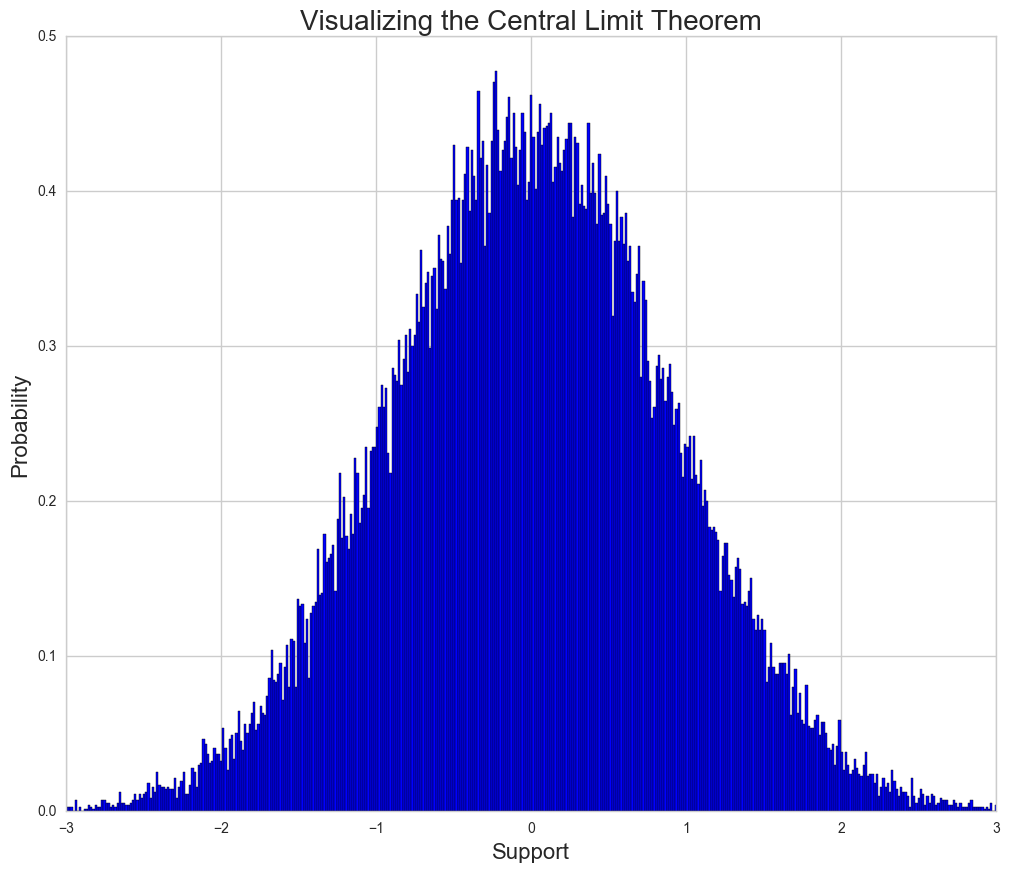

In [7]:
# Visual "proof" of the CLT.
# Start with a small number of replications, reps, and increase it to an ever larger value.  
# You will see the normal distribution emerge.
# This is not dependent on how we generate our samples.

reps = 50000
theta = np.zeros(reps)
bins = reps/100

for i in range(1, reps):
    theta[i] = np.random.logistic(0, 5, 100).mean()

plt.figure(figsize = (12,10))
plt.hist(theta, color='blue', normed=True, bins=bins)
plt.xlim(-3, 3)
plt.title('Visualizing the Central Limit Theorem', fontsize = 20)
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)